In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load data
df = pd.read_csv("online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#check info
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Handle missing values
df = df.dropna()

In [7]:
#Remove duplicates
df = df.drop_duplicates()

In [8]:
#covert date column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
#Create revenue column
df['Revenue']=df['Quantity']*df['UnitPrice']

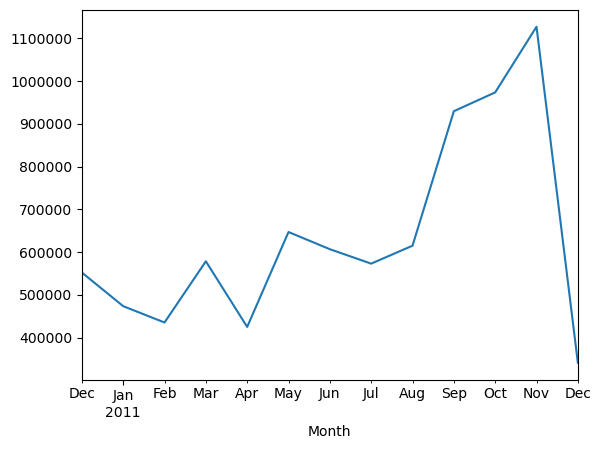

In [11]:
#Explatory data analysis(EDA)
#1. Monthly sales trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales=df.groupby('Month')['Revenue'].sum()
monthly_sales.plot()
plt.ticklabel_format(style='plain',axis='y')
plt.show()

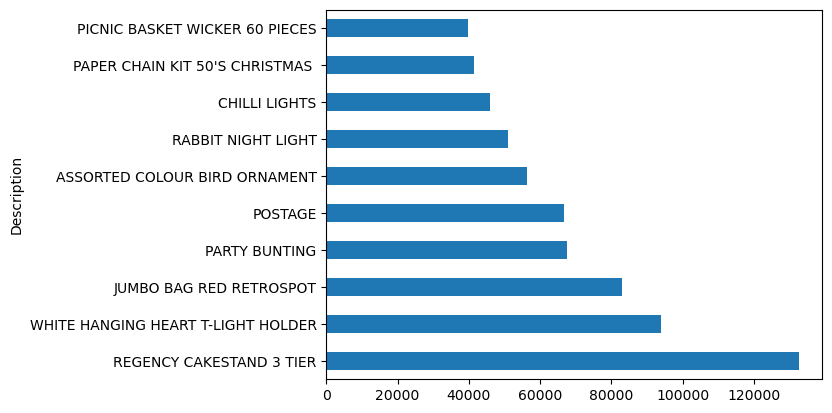

In [13]:
#2.Top 10 Products
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh')
plt.show()

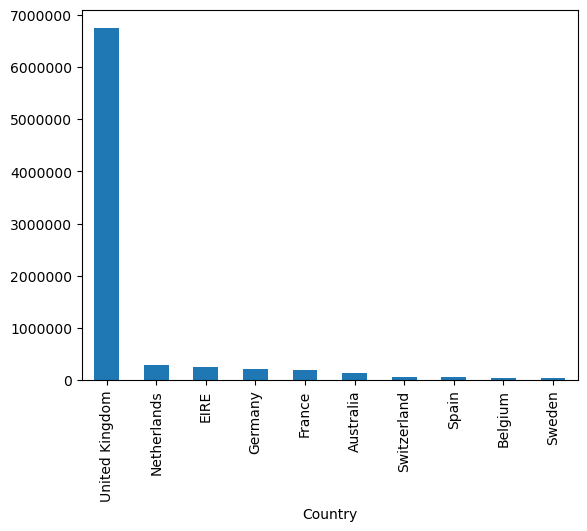

In [17]:
#3.Sales by country
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [18]:
df.to_csv('cleaned_retail.csv',index=False)

In [19]:
import os
os.getcwd()

'C:\\Users\\ABI\\OneDrive\\Documents\\ecommerece'